In [24]:
# importing libraries
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from copy import deepcopy
from sklearn.metrics.cluster import contingency_matrix
from sklearn.decomposition import PCA

In [25]:
# building the corpus
# the raw text from each file is inserted into a list of strings
# ground-truth labels for each document are also inserted into a list
raw_text = []
labels = []

directory = r'bbcsport/athletics'
text_pile = []
for filename in os.listdir(directory):
    with open ('bbcsport/athletics/' + filename, 'r') as file:
        temp = ''
        for line in file.readlines():
            linetext = line.strip()
            temp += ''.join([i for i in linetext if not i.isdigit()]) + ' '
        text_pile.append(str(temp))
        
raw_text += text_pile
for i in range(len(text_pile)):
    labels.append('athletics')
    

directory = r'bbcsport/cricket'
text_pile = []
for filename in os.listdir(directory):
    with open ('bbcsport/cricket/' + filename, 'r') as file:
        temp = ''
        for line in file.readlines():
            linetext = line.strip()
            temp += ''.join([i for i in linetext if not i.isdigit()]) + ' '
        text_pile.append(str(temp))
        
raw_text += text_pile
for i in range(len(text_pile)):
    labels.append('cricket')


directory = r'bbcsport/football'
text_pile = []
for filename in os.listdir(directory):
    with open ('bbcsport/football/' + filename, 'r') as file:
        temp = ''
        for line in file.readlines():
            linetext = line.strip()
            temp += ''.join([i for i in linetext if not i.isdigit()]) + ' '
        text_pile.append(str(temp))
        
raw_text += text_pile
for i in range(len(text_pile)):
    labels.append('football')


directory = r'bbcsport/rugby'
text_pile = []
for filename in os.listdir(directory):
    with open ('bbcsport/rugby/' + filename, 'r') as file:
        temp = ''
        for line in file.readlines():
            linetext = line.strip()
            temp += ''.join([i for i in linetext if not i.isdigit()]) + ' '
        text_pile.append(str(temp))
        
raw_text += text_pile
for i in range(len(text_pile)):
    labels.append('rugby')


directory = r'bbcsport/tennis'
text_pile = []
for filename in os.listdir(directory):
    with open ('bbcsport/tennis/' + filename, 'r') as file:
        temp = ''
        for line in file.readlines():
            linetext = line.strip()
            temp += ''.join([i for i in linetext if not i.isdigit()]) + ' '
        text_pile.append(str(temp))
        
raw_text += text_pile
for i in range(len(text_pile)):
    labels.append('tennis')


In [26]:
# check the length of both lists to ensure they match
print(len(raw_text))
print(len(labels))

737
737


In [27]:
# build a tfidf matrix from the raw text
tfidf = TfidfVectorizer(stop_words='english', min_df=200)
tfidf_matrix = tfidf.fit_transform(raw_text)
tfidf_array = tfidf_matrix.toarray()
print(tfidf_array.shape)

(737, 22)


In [28]:
# defining k-means function
def get_clusters(X, k):
    num_examples, dim = X.shape
    
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    centers_new = np.random.randn(k, dim) * std + mean   
    centers_old = np.zeros(centers_new.shape)
    
    labels = np.zeros(num_examples)
    distances = np.zeros((num_examples,k))
    
    error = np.linalg.norm(centers_new - centers_old)
    
    while error > 0.001:
        for i in range(k):
            distances[:,i] = np.linalg.norm(X - centers_new[i], axis=1)
            
        labels = np.argmin(distances, axis = 1)
        centers_old = deepcopy(centers_new)
        
        for i in range(k):
            centers_new[i] = np.mean(X[labels == i], axis=0)
            
        error = np.linalg.norm(centers_new - centers_old)
        
    return labels, centers_new

In [29]:
# training the k-means model
labels_pred, centers = get_clusters(tfidf_array, 5)

In [30]:
# define SSE function
def SSE(X, labels, centers):
    sse = 0
    n = X.shape[0]
    for i in range (n):
        sse += np.linalg.norm(X[i] - centers[labels[i]])
    return sse

In [31]:
# get SSE
print(SSE(tfidf_array, labels_pred, centers))

538.0116813139166


In [32]:
# purity index, conputed by referencing the confusion matrix
def purity_index(labels_true, labels_pred):
    confusion_matrix = contingency_matrix(labels_true, labels_pred)
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix) 
print(purity_index(labels, labels_pred))

0.4654002713704206


In [33]:
# display the documents in each cluster
for i in range(5):
    print("Cluster " + str(i+1) + ": ", end='')
    indices = []
    for j in range(len(labels_pred)):
        if labels_pred[j] == i:
            indices.append(j)
    for index in indices:
        print(str(index) + ", ", end='')
    print("\n")

Cluster 1: 8, 40, 41, 57, 59, 60, 69, 71, 74, 82, 85, 89, 92, 93, 97, 101, 103, 122, 144, 145, 146, 154, 160, 161, 165, 174, 177, 181, 182, 187, 188, 191, 192, 193, 212, 234, 235, 236, 237, 238, 239, 247, 264, 269, 276, 278, 293, 295, 299, 301, 303, 304, 309, 310, 320, 344, 349, 354, 355, 361, 368, 371, 376, 393, 398, 399, 408, 414, 421, 422, 426, 430, 431, 443, 469, 470, 471, 473, 477, 479, 483, 484, 485, 489, 497, 499, 500, 508, 517, 520, 531, 538, 547, 550, 570, 583, 586, 590, 605, 611, 623, 637, 638, 640, 641, 644, 645, 647, 649, 650, 651, 655, 656, 660, 662, 663, 666, 667, 669, 671, 673, 674, 675, 679, 682, 692, 696, 699, 700, 702, 704, 707, 713, 714, 721, 722, 723, 726, 727, 729, 730, 731, 732, 733, 734, 736, 

Cluster 2: 76, 102, 105, 106, 112, 113, 120, 127, 130, 131, 135, 140, 142, 150, 163, 164, 167, 168, 169, 171, 173, 175, 176, 179, 180, 183, 184, 189, 194, 195, 196, 197, 207, 209, 210, 217, 218, 219, 222, 229, 243, 250, 253, 255, 272, 292, 346, 356, 362, 367, 387, 388, 405

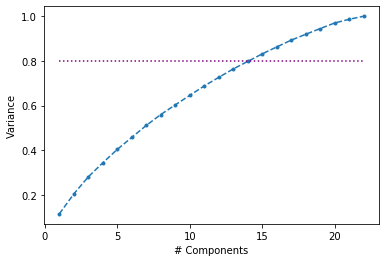

In [34]:
# implement PCA to reduce the number of dimensions of the data
# determine the optimal number of components by attempting to retain ~0.8 variance (100 components)
pca = PCA()
pca.fit(tfidf_array)
plt.plot(range(1,23), pca.explained_variance_ratio_.cumsum(), ms=3, linestyle='--', marker='o')
plt.plot(range(1,23), np.repeat(0.8, 22), c='purple', linestyle=':')
plt.xlabel('# Components')
plt.ylabel('Variance')
plt.show()

In [35]:
# fit the data to the PCA model
pca = PCA(n_components=14)
tfidf_pca = pca.fit_transform(tfidf_array)

In [36]:
# retrain the k-means model using the obtained PCA Scores
labels_pred, centers = get_clusters(tfidf_pca, 5)

In [37]:
# SSE has decreased
print(SSE(tfidf_pca, labels_pred, centers))

460.48992631843373


In [39]:
# converting notebook to html
os.system('jupyter nbconvert --to html BBCSport_Article_Clustering.ipynb')

0